# Import all the Dependancies required

In [165]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# read the CSV files and store it as a dataframe

In [166]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [167]:
train.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [168]:
train.shape

(30000, 24)

In [169]:
test.shape

(20000, 23)

In [170]:
train.isnull().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [171]:
#remove the rows with null values in dependant variable
train = train[train['Loan Sanction Amount (USD)'].notna()]

In [172]:
train.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [173]:
features_nan=[feature for feature in train.columns if train[feature].isnull().sum()>1]
for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(train[feature].isnull().mean(),4)))

Gender: 0.0018% missing values
Income (USD): 0.1515% missing values
Income Stability: 0.0559% missing values
Type of Employment: 0.2423% missing values
Current Loan Expenses (USD): 0.0056% missing values
Dependents: 0.0825% missing values
Credit Score: 0.0563% missing values
Has Active Credit Card: 0.0521% missing values
Property Age: 0.1605% missing values
Property Location: 0.0117% missing values


In [174]:
train.shape

(29660, 24)

In [175]:
train.head(20)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
5,C-17688,Polly Crumpler,F,60,1234.92,Low,State servant,Secretaries,Rural,34434.72,...,684.12,1,Inactive,491,1234.92,2,Rural,1,43146.82,22382.57
6,C-23855,Nathalie Olivier,M,43,2361.56,Low,Working,Laborers,Semi-Urban,152561.34,...,637.29,0,Unpossessed,227,2361.56,1,Semi-Urban,1,221050.80,0.00
7,C-11006,Clarinda Montana,F,45,NaN,Low,State servant,Managers,Semi-Urban,240311.77,...,812.26,0,Active,314,NaN,2,Urban,1,401040.70,168218.24
8,C-26934,Kenny Ankrom,F,38,1296.07,Low,Working,Cooking staff,Rural,35141.99,...,705.29,1,Active,241,1296.07,4,Rural,1,54903.44,22842.29
9,C-24944,Barbie Goetsch,M,18,1546.17,Low,Working,Laborers,Rural,42091.29,...,613.24,0,Unpossessed,883,1546.17,2,Urban,1,67993.43,0.00


In [176]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29660 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  29660 non-null  object 
 1   Name                         29660 non-null  object 
 2   Gender                       29608 non-null  object 
 3   Age                          29660 non-null  int64  
 4   Income (USD)                 25167 non-null  float64
 5   Income Stability             28002 non-null  object 
 6   Profession                   29660 non-null  object 
 7   Type of Employment           22472 non-null  object 
 8   Location                     29660 non-null  object 
 9   Loan Amount Request (USD)    29660 non-null  float64
 10  Current Loan Expenses (USD)  29493 non-null  float64
 11  Expense Type 1               29660 non-null  object 
 12  Expense Type 2               29660 non-null  object 
 13  Dependents      

In [177]:
train['Income Stability'].value_counts()

Low     25458
High     2544
Name: Income Stability, dtype: int64

In [178]:
train['Profession'].value_counts()

Working                 16739
Commercial associate     7863
Pensioner                2718
State servant            2334
Businessman                 2
Unemployed                  2
Maternity leave             1
Student                     1
Name: Profession, dtype: int64

In [179]:
train['Location'].value_counts()

Semi-Urban    21317
Rural          5280
Urban          3063
Name: Location, dtype: int64

In [180]:
train['Property Location'].value_counts()

Semi-Urban    10255
Rural          9929
Urban          9129
Name: Property Location, dtype: int64

<AxesSubplot:>

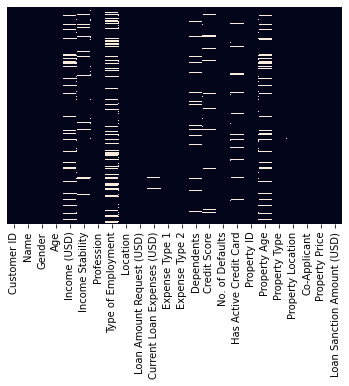

In [181]:
sb.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [182]:
train['Credit Score']=train['Credit Score'].fillna(train['Credit Score'].mean())
train['Dependents']=train['Dependents'].fillna(train['Dependents'].mean())
train['Income (USD)']=train['Income (USD)'].fillna(train['Income (USD)'].mean())
train['Current Loan Expenses (USD)']=train['Current Loan Expenses (USD)'].fillna(train['Current Loan Expenses (USD)'].mean())

In [183]:
train.isnull().sum()

Customer ID                       0
Name                              0
Gender                           52
Age                               0
Income (USD)                      0
Income Stability               1658
Profession                        0
Type of Employment             7188
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Expense Type 1                    0
Expense Type 2                    0
Dependents                        0
Credit Score                      0
No. of Defaults                   0
Has Active Credit Card         1546
Property ID                       0
Property Age                   4760
Property Type                     0
Property Location               347
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)        0
dtype: int64

In [184]:
train=train.drop(['Customer ID','Name','Property Age','Gender'], axis = 1)

In [185]:
train

,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,56,1933.050000,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.000000,809.440000,0,NaN,746,4,Rural,1,119933.46,54607.18
1,32,4952.910000,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.000000,780.400000,0,Unpossessed,608,2,Rural,1,54791.00,37469.98
2,65,988.190000,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.000000,833.150000,0,Unpossessed,546,2,Urban,0,72440.58,36474.43
3,65,2630.990563,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.000000,832.700000,1,Unpossessed,890,2,Semi-Urban,1,121441.51,56040.54
4,31,2614.770000,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,2.253399,745.550000,1,Active,715,4,Semi-Urban,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,38,4969.410000,Low,Commercial associate,Managers,Urban,76657.90,722.34,Y,Y,2.000000,869.610000,0,Unpossessed,566,4,Urban,1,111096.56,68992.11
29996,20,1606.880000,Low,Working,Laborers,Semi-Urban,66595.14,253.04,N,N,3.000000,729.410000,0,Inactive,175,3,Urban,1,73453.94,46616.60
29997,49,2630.990563,Low,Working,Sales staff,Urban,81410.08,583.11,N,Y,2.253399,739.853475,0,Active,959,1,Rural,1,102108.02,61057.56
29998,38,2417.710000,Low,Working,Security staff,Semi-Urban,142524.10,378.29,N,Y,3.000000,677.270000,1,Unpossessed,375,4,Urban,1,168194.47,99766.87


In [186]:
train['Income Stability'].fillna('Unk',inplace=True)
train['Type of Employment'].fillna('un',inplace=True)
train['Has Active Credit Card'].fillna('stunk',inplace=True)
train['Property Location'].fillna("unk",inplace=True)

In [187]:
train.isnull().sum()

Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [188]:
col=['Income Stability','Profession','Type of Employment','Location','Expense Type 1','Expense Type 2','Has Active Credit Card','Property Location']
for fields in col:
        
        print(fields)
        df1=pd.get_dummies(test[fields],prefix=fields,drop_first=True)
        
        test.drop([fields],axis=1,inplace=True)
        test=pd.concat([test,df1],axis=1)
        #df_final=pd.concat([final_df,df_final],axis=1)

Income Stability
Profession
Type of Employment
Location
Expense Type 1
Expense Type 2
Has Active Credit Card
Property Location


In [189]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29660 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          29660 non-null  int64  
 1   Income (USD)                 29660 non-null  float64
 2   Income Stability             29660 non-null  object 
 3   Profession                   29660 non-null  object 
 4   Type of Employment           29660 non-null  object 
 5   Location                     29660 non-null  object 
 6   Loan Amount Request (USD)    29660 non-null  float64
 7   Current Loan Expenses (USD)  29660 non-null  float64
 8   Expense Type 1               29660 non-null  object 
 9   Expense Type 2               29660 non-null  object 
 10  Dependents                   29660 non-null  float64
 11  Credit Score                 29660 non-null  float64
 12  No. of Defaults              29660 non-null  int64  
 13  Has Active Credi

In [190]:
df = fi_df.select_dtypes(exclude=['object'])

In [191]:
first_column = df.pop('Loan Sanction Amount (USD)')
df.insert(48, 'Loan Sanction Amount (USD)', first_column)

In [192]:
df.head(2)

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Type,Co-Applicant,...,Location_Urban,Expense Type 1_Y,Expense Type 2_Y,Has Active Credit Card_Inactive,Has Active Credit Card_Unpossessed,Has Active Credit Card_stunk,Property Location_Semi-Urban,Property Location_Urban,Property Location_unk,Loan Sanction Amount (USD)
0,56,1933.05,72809.58,241.08,3.0,809.44,0,746,4,1,...,0,0,0,0,0,1,0,0,0,54607.18
1,32,4952.91,46837.47,495.81,1.0,780.40,0,608,2,1,...,0,0,1,0,1,0,0,0,0,37469.98


In [193]:
train['Property Price'].mean()

131733.51717026386

In [38]:
df_Train=df.iloc[:24222,:]
df_Test=df.iloc[24222:,:]
df.astype('float64')
X_train=df_Train.drop(['Loan Sanction Amount (USD)'],axis=1)
y_train=df_Train['Loan Sanction Amount (USD)']
X_test=df_Test.drop(['Loan Sanction Amount (USD)'],axis=1)
y_test=df_Test['Loan Sanction Amount (USD)']
y_train

0        54607.18
1        37469.98
2        36474.43
3        56040.54
4        74008.28
           ...   
24498    16703.46
24499    96271.30
24500        0.00
24501        0.00
24502        0.00
Name: Loan Sanction Amount (USD), Length: 24222, dtype: float64

In [79]:
X_train.shape

(24222, 48)

In [34]:
!pip install xgboost

In [42]:
import xgboost
classifier=xgboost.XGBRegressor()

In [43]:
import xgboost
regressor=xgboost.XGBRegressor()

In [53]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.003, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1600, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
y_actual=y_test
y_pred=regressor.predict(X_test)

In [70]:
y_pred

array([ 26425.578  ,  75643.79   ,   -218.88188, ...,  55126.957  ,
        94274.58   , 100783.625  ], dtype=float32)

In [56]:
from sklearn.metrics import r2_score
print(r2_score(y_actual,y_pred))

0.7850002145892738


In [131]:
def clean(dataframe):
    #dataframe = dataframe[dataframe['Loan Sanction Amount (USD)'].notna()]
    dataframe['Credit Score']=dataframe['Credit Score'].fillna(dataframe['Credit Score'].mean())
    dataframe['Dependents']=dataframe['Dependents'].fillna(dataframe['Dependents'].mean())
    dataframe['Income (USD)']=dataframe['Income (USD)'].fillna(dataframe['Income (USD)'].mean())
    dataframe['Current Loan Expenses (USD)']=dataframe['Current Loan Expenses (USD)'].fillna(dataframe['Current Loan Expenses (USD)'].mean())
    dataframe=dataframe.drop(['Customer ID','Name','Property Age','Gender'], axis = 1)
    dataframe['Income Stability'].fillna('Unk',inplace=True)
    dataframe['Type of Employment'].fillna('un',inplace=True)
    dataframe['Has Active Credit Card'].fillna('stunk',inplace=True)
    dataframe['Property Location'].fillna("unk",inplace=True)
#multicol=['Income Stability','Profession','Type of Employment','Location','Expense Type 1','Expense Type 2','Has Active Credit Card','Property Location']
    return dataframe

In [132]:
test=clean(test)

In [133]:
multicol=['Income Stability','Profession','Type of Employment','Location','Expense Type 1','Expense Type 2','Has Active Credit Card','Property Location']
for fields in multicol:
        
        print(fields)
        df1=pd.get_dummies(test[fields],prefix=fields,drop_first=True)
        
        test.drop([fields],axis=1,inplace=True)
        test=pd.concat([test,df1],axis=1)
        #df_final=pd.concat([final_df,df_final],axis=1)

Income Stability
Profession
Type of Employment
Location
Expense Type 1
Expense Type 2
Has Active Credit Card
Property Location


In [134]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 47 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       20000 non-null  int64  
 1   Income (USD)                              20000 non-null  float64
 2   Loan Amount Request (USD)                 20000 non-null  float64
 3   Current Loan Expenses (USD)               20000 non-null  float64
 4   Dependents                                20000 non-null  float64
 5   Credit Score                              20000 non-null  float64
 6   No. of Defaults                           20000 non-null  int64  
 7   Property ID                               20000 non-null  int64  
 8   Property Type                             20000 non-null  int64  
 9   Co-Applicant                              20000 non-null  object 
 10  Property Price                    

In [139]:
test['Profession_Commercial associate'] = 0
test['Co-Applicant'].replace('?',1,inplace=True)
test['Property Price'].replace('?',131759.68025233425,inplace=True)
#test['Co-Applicant'] = test['Co-Applicant'].fillna( method ='ffill', inplace = True)
#test['Property Price'] = test['Property Price'].fillna( method ='ffill', inplace = True)

In [140]:
olumn = test.pop('Profession_Commercial associate')
test.insert(13, 'Profession_Commercial associate', olumn)
test.info()
test["Co-Applicant"] = pd.to_numeric(test["Co-Applicant"], downcast="float")
test["Property Price"] = pd.to_numeric(test["Property Price"], downcast="float")
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 48 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       20000 non-null  int64  
 1   Income (USD)                              20000 non-null  float64
 2   Loan Amount Request (USD)                 20000 non-null  float64
 3   Current Loan Expenses (USD)               20000 non-null  float64
 4   Dependents                                20000 non-null  float64
 5   Credit Score                              20000 non-null  float64
 6   No. of Defaults                           20000 non-null  int64  
 7   Property ID                               20000 non-null  int64  
 8   Property Type                             20000 non-null  int64  
 9   Co-Applicant                              20000 non-null  object 
 10  Property Price                    

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Type,Co-Applicant,...,Location_Semi-Urban,Location_Urban,Expense Type 1_Y,Expense Type 2_Y,Has Active Credit Card_Inactive,Has Active Credit Card_Unpossessed,Has Active Credit Card_stunk,Property Location_Semi-Urban,Property Location_Urban,Property Location_unk
0,47,3472.69,137088.98,396.72,2.000000,799.140000,0,843,2,1.0,...,1,0,0,0,0,1,0,0,1,0
1,57,1184.84,104771.59,463.76,2.000000,833.310000,0,22,1,1.0,...,0,0,1,1,0,1,0,0,0,0
2,52,1266.27,176684.91,493.15,3.000000,627.440000,0,1,1,1.0,...,1,0,0,1,0,1,0,0,1,0
3,65,1369.72,97009.18,446.15,2.000000,833.200000,0,730,1,0.0,...,0,0,0,1,1,0,0,1,0,0
4,60,1939.23,109980.00,370.10,2.251246,738.821538,0,356,4,1.0,...,0,1,0,0,0,0,1,1,0,0


In [141]:
pre = regressor.predict(test)
pred = pd.DataFrame(pre, columns=['Loan Sanction Amount (USD)'])

In [142]:
pred

,Loan Sanction Amount (USD)
0,87836.484375
1,64978.531250
2,358.048492
3,69615.867188
4,49959.980469
...,...
19995,83005.531250
19996,29634.027344
19997,-399.547333
19998,75154.101562


In [143]:
tes=pd.read_csv("test.csv")

In [144]:
tes=pd.concat([tes,pred],axis=1)

In [145]:
tes.isnull().sum()

Customer ID                       0
Name                              0
Gender                           31
Age                               0
Income (USD)                    750
Income Stability                813
Profession                        0
Type of Employment             4689
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property ID                       0
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)        0
dtype: int64

In [198]:
sub = tes.loc[:, tes.columns.intersection(['Customer ID','Loan Sanction Amount (USD)'])]

In [202]:
num = sub._get_numeric_data()
num[num < 0] = 0
num=pd.concat([sub['Customer ID'],num],axis=1)
num.to_csv("sub1.csv")

In [153]:
sub.to_csv("submssion.csv")

In [152]:
sub.head()

,Customer ID,Loan Sanction Amount (USD)
0,C-26247,87836.484375
1,C-35067,64978.531250
2,C-34590,358.048492
3,C-16668,69615.867188
4,C-12196,49959.980469


In [203]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoCV
#split into test/train and normalize

alphas = np.logspace(-4, 4, 14) #10**start, 10**end, num_samples,
lasso_cv = LassoCV(max_iter=10**6,alphas=alphas)
lasso_cv.fit(X_train,y_train)
y_pred = lasso_cv.predict(X_test)
    
print("Lasso CV Mean squared error:", mean_squared_error(y_test, y_pred))
print('Lasso CV Variance score aka r^2:', r2_score(y_test, y_pred))
    
coefficients = lasso_cv.coef_
    #best alpha chosen by cv
alpha = lasso_cv.alpha_

Lasso CV Mean squared error: 910634492.5841446
Lasso CV Variance score aka r^2: 0.6216368967400927


In [205]:
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np

data = datasets.load_diabetes()

alphas = np.array([5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01,0.001, 0.0001, 0 ])

model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))

grid.fit(X_train,y_train)
y_pred = grid.predict(X_test)
    
print("Lasso CV Mean squared error:", mean_squared_error(y_test, y_pred))
print('Lasso CV Variance score aka r^2:', r2_score(y_test, y_pred))
print(grid.best_estimator_.alpha)
print(grid.best_score_)

C:\Users\naveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9223897501649.717, tolerance: 4463669386.750496
  model = cd_fast.enet_coordinate_descent(
C:\Users\naveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9314094723497.98, tolerance: 4473373636.571201
  model = cd_fast.enet_coordinate_descent(
C:\Users\naveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8554326638690.312, tolerance: 4481260341.911336
  model = cd_fast.enet_coordinate_descent(
C:\Users\naveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

C:\Users\naveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9243596138788.69, tolerance: 4463669386.750496
  model = cd_fast.enet_coordinate_descent(
C:\Users\naveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9369548344557.797, tolerance: 4473373636.571201
  model = cd_fast.enet_coordinate_descent(
C:\Users\naveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9457187933434.848, tolerance: 4481260341.911336
  model = cd_fast.enet_coordinate_descent(
C:\Users\naveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

Lasso CV Mean squared error: 910050745.0328021
Lasso CV Variance score aka r^2: 0.6218794403037782
5.0
0.5761089992808984


In [207]:
from scipy.stats import uniform 
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': uniform()}

model = Lasso()
rand_search = RandomizedSearchCV(estimator=model, 
                                 param_distributions=param_grid,
                                 n_iter=100)

rand_search.fit(data.data, data.target)
rand_search.fit(X_train,y_train)
y_pred = grid.predict(X_test)
    
print("Lasso CV Mean squared error:", mean_squared_error(y_test, y_pred))
print('Lasso CV Variance score aka r^2:', r2_score(y_test, y_pred))
print(rand_search.best_estimator_.alpha)
print(rand_search.best_score_)

C:\Users\naveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8676311169124.013, tolerance: 4463669386.750496
  model = cd_fast.enet_coordinate_descent(
C:\Users\naveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9220226926432.23, tolerance: 4473373636.571201
  model = cd_fast.enet_coordinate_descent(
C:\Users\naveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9169894181395.436, tolerance: 4516373729.3092165
  model = cd_fast.enet_coordinate_descent(
C:\Users\naveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\naveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9235480635840.857, tolerance: 4473373636.571201
  model = cd_fast.enet_coordinate_descent(
C:\Users\naveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9212508191025.592, tolerance: 4516373729.3092165
  model = cd_fast.enet_coordinate_descent(
C:\Users\naveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9223200156209.213, tolerance: 4463669386.750496
  model = cd_fast.enet_coordinate_descent(
C:\Users\naveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\naveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9179392517647.686, tolerance: 4413551318.716315
  model = cd_fast.enet_coordinate_descent(
C:\Users\naveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4770437363090.267, tolerance: 4463669386.750496
  model = cd_fast.enet_coordinate_descent(
C:\Users\naveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9169842069979.545, tolerance: 4473373636.571201
  model = cd_fast.enet_coordinate_descent(
C:\Users\naveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\naveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9215080320172.865, tolerance: 4463669386.750496
  model = cd_fast.enet_coordinate_descent(
C:\Users\naveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9297176407428.54, tolerance: 4473373636.571201
  model = cd_fast.enet_coordinate_descent(
C:\Users\naveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7405118304323.178, tolerance: 4481260341.911336
  model = cd_fast.enet_coordinate_descent(
C:\Users\naveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

Lasso CV Mean squared error: 910050745.0328021
Lasso CV Variance score aka r^2: 0.6218794403037782
0.9870528889363781
0.5759209816986421
